In [1]:
import numpy as np
import pandas as pd

In [9]:
def sigmoid(z):
    value = 1/(1+np.exp(-z))
    return value

Regularized Logistic Regression:

$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$

Without Regularization:

$$ J(\mathbf{w}.b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\right]$$

difference: $$\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$ 


In [ ]:
def calculate_cost(x_values, y_values, w_values, b, lambda_ = 1):
    
    m,n  = x_values.shape
    total_cost = 0
    for i in range(m):                          
        f_i = sigmoid(np.dot(x_values[i], w_values) + b)                                   
        total_cost +=  -y_values[i]*np.log(f_i) - (1-y_values[i])*np.log(1-f_i)     
    total_cost /= m                                                     

    regularized_cost = 0
    for j in range(n):
        regularized_cost += (w_values[j]**2)                                         
    regularized_cost = (lambda_/(2*m)) * regularized_cost                            
    
    total_cost += regularized_cost                                   
    return total_cost             

In [69]:
def map_feature(x1, x2, degree=6):
    x1 = np.atleast_1d(x1)
    x2 = np.atleast_1d(x2)
    output = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            output.append((x1**(i-j) * (x2**j)))
    return np.stack(output, axis=1)


In [6]:
data = np.loadtxt("../data/logisticRegressionCircular.txt", delimiter=',')
x_values = data[:,:2]
y_values = data[:,2]


In [11]:
mapped_x =  map_feature(x_values[:, 0], x_values[:, 1],6)

In [12]:
print("Original shape of data:", x_values.shape)
print("Shape after feature mapping:", mapped_x.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


Regularized:

$$\frac{\partial J(\mathbf{w},b)}{\partial b} = \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})  $$

$$\frac{\partial J(\mathbf{w},b)}{\partial w_j} = \left( \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)} \right) + \frac{\lambda}{m} w_j  \quad\, \mbox{for $j=0...(n-1)$}$$

Without Regularization
$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) 
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} 
$$


In [17]:
def calculate_gradient_descent(x_values, y_values, w_values, b, lambda_ = 1): 
    m,n = x_values.shape # tuple (m,n)
    derivatives_w = np.zeros(n)                         
    derivative_b = 0

    for i in range(m):
        f_i = sigmoid(np.dot(x_values[i],w_values) + b)          
        error_i  = f_i  - y_values[i]                      
        for j in range(n):
            derivatives_w[j] = derivatives_w[j] + error_i * x_values[i,j]     
        derivative_b = derivative_b + error_i
                                
    derivative_b /= m
    derivatives_w /= m
    
    for j in range(n):
        derivatives_w[j] = derivatives_w[j] + (lambda_/m) * w_values[j]

    return derivative_b, derivatives_w  

In [22]:
import copy

def gradient_descent(x_values, y_values, w_initial_values, b_initial, cost_function, gradient_function, alpha, iterations, lambda_): 
    

    cost_cache = []
    w_values = copy.deepcopy(w_initial_values)  
    b = b_initial
    for i in range(iterations):

        derivative_b,derivatives_w = gradient_function(x_values, y_values, w_values, b, lambda_)   

        w_values = w_values - alpha * derivatives_w              
        b = b - alpha * derivative_b
        
        if i<100000:
            cost_cache.append(cost_function(x_values, y_values, w_values, b, lambda_))
            
    return w_values, b, cost_cache 

In [48]:
np.random.seed(1)
w_initial = np.random.rand(mapped_x.shape[1])-0.5
b_initial = 1
lambda_ = 0.01    
iterations = 50000
learning_rate = 0.06

In [49]:
w_final,b_final, cost_cache = gradient_descent(mapped_x, y_values, w_initial, b_initial, 
                                    calculate_cost, calculate_gradient_descent, 
                                    learning_rate, iterations, lambda_)

In [50]:
def predict(x_values, w_values, b): 
    m, n = x_values.shape   
    predictions = np.zeros(m)
    for i in range(m):
        f_i = sigmoid(np.dot(x_values[i],w_values) + b)
        predictions[i] = f_i >= 0.5
    return predictions


In [51]:
p = predict(mapped_x, w_final,b_final)
print('Accuracy: %f'%(np.mean(p == y_values) * 100))

Accuracy: 84.745763


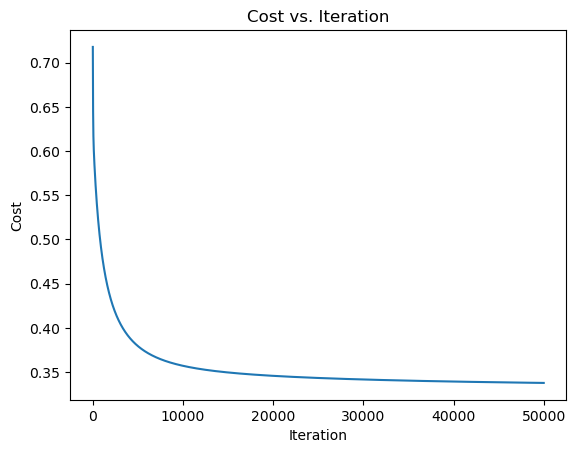

In [57]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(cost_cache)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs. Iteration')
plt.show()

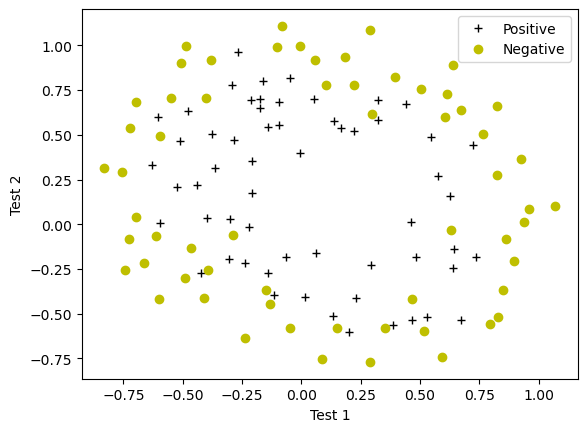

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


In [63]:
positive = y_values == 1
negative = y_values == 0

plt.plot(x_values[positive, 0], x_values[positive, 1], 'k+', label="Positive")
plt.plot(x_values[negative, 0], x_values[negative, 1], 'yo', label="Negative")

plt.ylabel('Test 2') 
plt.xlabel('Test 1') 
plt.legend(loc="upper right")
plt.show()


In [64]:
def plot_data(x_values, y_values, label_1="POSITIVE (y=1)", label_0="NEGATIVE (y=0)"):
    positive = y_values == 1
    negative = y_values == 0
    
    plt.plot(x_values[positive, 0], x_values[positive, 1], 'k+', label=label_1)
    plt.plot(x_values[negative, 0], x_values[negative, 1], 'yo', label=label_0)
    

In [87]:
def plot_decision_boundary(x_values, y_values, w_values, b):
    # identifying which points are positive (y_values == 1) and which are negative (y_values == 0)
    positive = y_values == 1
    negative = y_values == 0

    # plotting positive points as black '+' and negative points as yellow 'o'
    plt.plot(x_values[positive, 0], x_values[positive, 1], 'k+', label='Positive Class')
    plt.plot(x_values[negative, 0], x_values[negative, 1], 'yo', label='Negative Class')

    # checking if the data is one or two dimensional
    if x_values.shape[1] <= 2:
        # defining a range for the decision boundary
        plot_x = np.array([min(x_values[:, 0]), max(x_values[:, 0])])
        # computing the corresponding y values for the decision boundary line
        plot_y = (-1. / w_values[1]) * (w_values[0] * plot_x + b)
        # plotting the decision boundary line
        plt.plot(plot_x, plot_y, c="b")

    # if the data is more than two-dimensional
    else:
        # creating a grid of values between -1 and 1.5 for u and v
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        
        # initializing an empty matrix for storing the computed values
        z = np.zeros((len(u), len(v)))

        # looping over each element in u and v to compute z using the sigmoid function
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), w_values) + b)
        
        # transposing z before plotting (necessary for contour plot)
        # plotting the contour plot where z = 0.5 (decision boundary)
        plt.contour(u, v, z.T, levels = [0.5], colors="g")


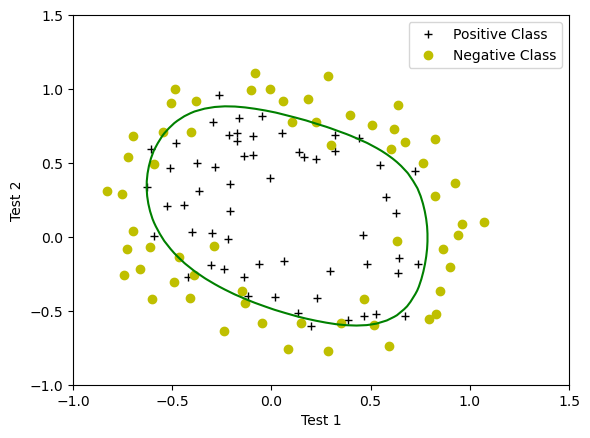

In [88]:
plot_decision_boundary(mapped_x, y_values, w_final, b_final)

plt.ylabel('Test 2') 

plt.xlabel('Test 1') 
plt.legend(loc="upper right")
plt.show()